## Finite Immediate Response Environment

In [ ]:
import argparse
from argparse import Namespace

urm_log_path = 'output/kuairand_1k/env/log/user_KRMBUserResponse_MaxOut_lr0.0001_reg0.01.model.log'
TEMPER=10
SLATE_SIZE=6
MAX_STEP=10
EP_BS=4
RHO=0.1
device='cpu'
args = eval(f"Namespace(uirm_log_path='{urm_log_path}', initial_temper={TEMPER}, slate_size={SLATE_SIZE}, \
max_step_per_episode={MAX_STEP}, episode_batch_size={EP_BS}, item_correlation={RHO}, device='{device}', env_val_holdout=1000, env_test_holdout=1000, new_reader_class='KRMBSeqReader')")

In [2]:
from env.KRUserEnvironment_FiniteImmediate import KRUserEnvironment_FiniteImmediate
env = KRUserEnvironment_FiniteImmediate(args)

/opt/conda/envs/pt_rlsim/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load immediate user response model
Load (checkpoint) from output/kuairand_1k/env/user_KRMBUserResponse_MaxOut_lr0.0001_reg0.01.model.checkpoint
{'raw_data_size': 2597865, 'data_size': [2587875, 4995, 4995], 'n_user': 999, 'n_item': 69219, 'max_seq_len': 50, 'user_features': ['user_active_degree', 'is_live_streamer', 'is_video_author', 'follow_user_num_range', 'fans_user_num_range', 'friend_user_num_range', 'register_days_range', 'onehot_feat0', 'onehot_feat1', 'onehot_feat6', 'onehot_feat9', 'onehot_feat10', 'onehot_feat11'], 'user_feature_dims': {'user_active_degree': 7, 'is_live_streamer': 2, 'is_video_author': 2, 'follow_user_num_range': 8, 'fans_user_num_range': 8, 'friend_user_num_range': 7, 'register_days_range': 7, 'onehot_feat0': 2, 'onehot_feat1': 7, 'onehot_feat6': 3, 'onehot_feat9': 7, 'onehot_feat10': 5, 'onehot_feat11': 3}, 'item_features': ['video_type', 'music_type', 'upload_type', 'tag'], 'item_feature_dims': {'video_type': 3, 'music_type': 7, 'upload_type': 32, 'tag': 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 8611.17it/s]


build vocab for onehot features


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  6.41it/s]


build vocab for multihot features:
	tag


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4371868/4371868 [00:02<00:00, 1700351.90it/s]


sequence holdout for users (-1, 0, 0)
{'raw_data_size': 2597865, 'data_size': [2597865, 0, 0], 'n_user': 999, 'n_item': 69219, 'max_seq_len': 50, 'user_features': ['user_active_degree', 'is_live_streamer', 'is_video_author', 'follow_user_num_range', 'fans_user_num_range', 'friend_user_num_range', 'register_days_range', 'onehot_feat0', 'onehot_feat1', 'onehot_feat6', 'onehot_feat9', 'onehot_feat10', 'onehot_feat11'], 'user_feature_dims': {'user_active_degree': 7, 'is_live_streamer': 2, 'is_video_author': 2, 'follow_user_num_range': 8, 'fans_user_num_range': 8, 'friend_user_num_range': 7, 'register_days_range': 7, 'onehot_feat0': 2, 'onehot_feat1': 7, 'onehot_feat6': 3, 'onehot_feat9': 7, 'onehot_feat10': 5, 'onehot_feat11': 3}, 'item_features': ['video_type', 'music_type', 'upload_type', 'tag'], 'item_feature_dims': {'video_type': 3, 'music_type': 7, 'upload_type': 32, 'tag': 59}, 'feedback_type': ['is_click', 'long_view', 'is_like', 'is_comment', 'is_forward', 'is_follow', 'is_hate'], 

In [3]:
obs = env.reset()

In [4]:
print(obs['user_profile'].keys())

dict_keys(['user_id', 'uf_user_active_degree', 'uf_is_live_streamer', 'uf_is_video_author', 'uf_follow_user_num_range', 'uf_fans_user_num_range', 'uf_friend_user_num_range', 'uf_register_days_range', 'uf_onehot_feat0', 'uf_onehot_feat1', 'uf_onehot_feat6', 'uf_onehot_feat9', 'uf_onehot_feat10', 'uf_onehot_feat11'])


In [6]:
import torch
from tqdm import tqdm
N = env.action_space
for i in tqdm(range(1000)):
    random_action = torch.randint(0,N,(EP_BS, SLATE_SIZE)).to(device)
    observation = env.step({'action': random_action})

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:15<00:00,  3.17it/s]


In [7]:
env.get_env_report()

{'is_click': 3.6274996,
 'long_view': 3.5275004,
 'is_like': 1.4391667,
 'is_comment': 1.5191667,
 'is_forward': 1.9949999,
 'is_follow': 1.9933336,
 'is_hate': 1.0925001}

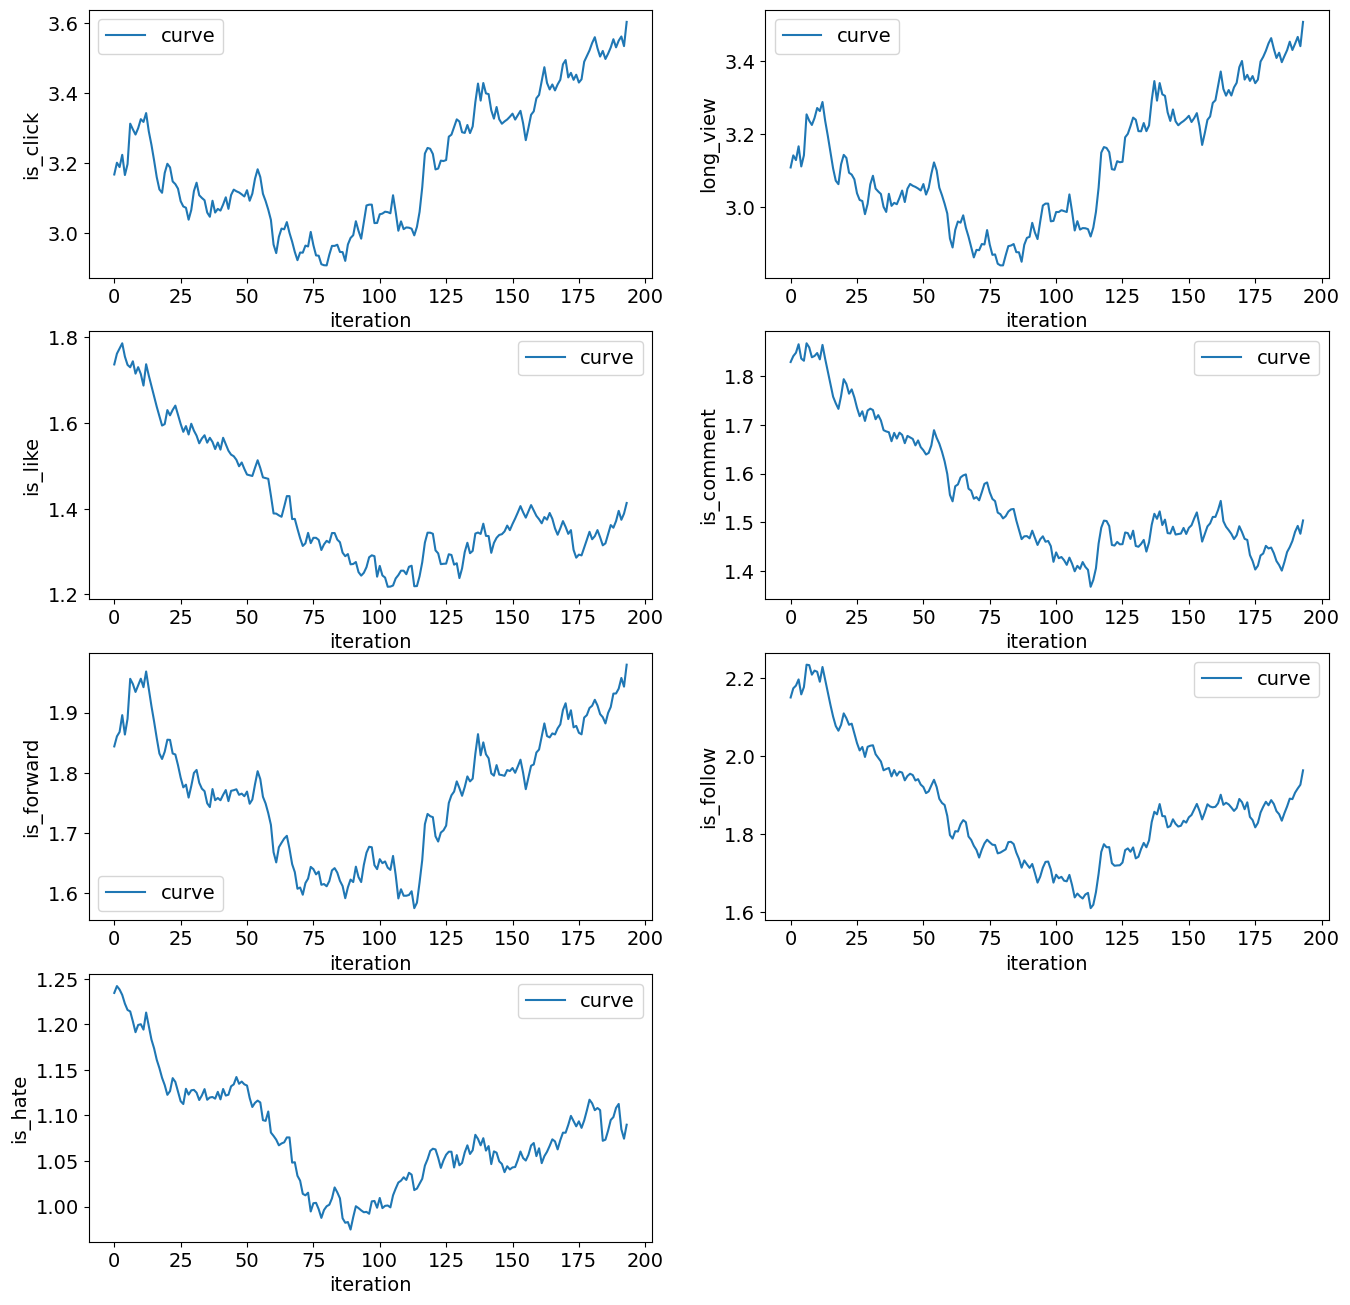

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from plot_utils import multiplot_multiple_line, smooth

smoothness = 100
info = {f: smooth(env.env_response_history[f], smoothness) for f in env.response_types}
info['iteration'] = np.arange(len(info[env.response_types[0]]))
multiplot_multiple_line(["curve"], [info], x_name = 'iteration')